In [15]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import copy

from decimal import Decimal

matplotlib.use('nbagg')

In [16]:
class explict_runge:
    # curently classic 4-runge is written
    c = np.array([1/2, 1/2, 1])
    tri_a = np.array([1/2, 0, 1/2, 0, 0, 1])
    b = np.array([1/6, 2/6, 2/6, 1/6])
    
    def __init__(self, func, x_lim, x_0, y_0, N):
        self.func = func # right function
        self.x_lim = x_lim # borders
        
        self.x_0 = x_0 # initial condintion
        self.y_0 = y_0 # inintinal condition
        
        self.N = N # the number of uniform points
        
    def calc(self, h, Number_of_points, end, calc_err = False):
        
        k = 4 # unfortunetly this value is theoretical =c
        
        # this class methods starts calculation form init_point to end with step h
        
        x_res = np.linspace(self.x_0, end, num = Number_of_points, endpoint = True)
        y_res = np.empty(Number_of_points)
        
        if(calc_err):
            y_prob_res = np.empty(Number_of_points)
        
        if(h > 0):
            num = 1
            y_res[0] = self.y_0
            if(calc_err):
                y_prob_res[0] = self.y_0
        else:
            num = 1
            y_res[Number_of_points-1] = self.y_0
            if(calc_err):
                y_prob_res[Number_of_points-1] = self.y_0
        
        y = self.y_0
        f = np.empty(self.b.size)
        
        # just to estimate an error
        if(calc_err):
            i = 0
            error = 0
        
        for x in np.arange(self.x_0, end, h):
            
            if(calc_err and i == 0):
                y_prob = self.perform_one_step(x, y, f, 2*h)
                
            y = self.perform_one_step(x, y, f, h)
                
            if(calc_err and i == 1):
                error = max(error, abs(y_prob-y))
                
            if(calc_err):
                i = (i+1)%2
                
            if(calc_err and abs(x+2*h - x_res[num]) < abs(h) ):
                y_prob_res[num] = y_prob
                
            if( abs(x+h - x_res[num]) < abs(h)/2 ):
                y_res[num] = y
                num += 1
                
        if(calc_err):
            return y_res, y_prob_res, error
                    
        # if h is negative the inverse value is returned (be aware)
        return y_res
            
    def perform_one_step(self, x, y, f, h):
        # caluclating stages in explict runge-kutta methods
        f[0] = self.func(x, y)
        for i in range(1, self.b.size):
            f[i] = ( self.func(x+self.c[i-1]*h, y + 
                                   h*sum(f[j]*self.tri_a[i*(i-1)//2+j] for j in range(i) ) ))
        
        # caluclating a step
        return y+h *np.dot(self.b, f)
        
    def match(self, eps, show = False):
        
        h = (self.x_lim[1]-self.x_lim[0])/(2*(self.N-1))
        
        error_list = []
        
        error = 2*eps
        
        if(show == True):
            print(
                '|  x '+''.join(' ' for i in range(10))+ '| '  +'| '.join('{:.4E} '.format(x) 
                         for x in np.linspace(self.x_lim[0], self.x_lim[1], num = self.N, endpoint = True)) + '|')
        
        l = 1
        
        y_last = np.zeros(self.N)
        
        list_y = []
        
        while(error >= eps):
        
            if(self.x_lim[1] > self.x_0 and self.x_lim[0] < self.x_0):
                num = round(self.N * (self.x_0 - self.x_lim[0]) / (self.x_lim[1]-self.x_lim[0]) )

                y_1_h, y_1_2h, err1  = self.calc(h, self.N - num+1, x_lim[1], calc_err = True)
                y_2_h, y_2_2h, err2  = self.calc(-h, num+1, x_lim[0], calc_err = True)

                error = max(err1, err2)

                y_h = np.concatenate([y_2_h[-1:0:-1], y_1_h])
                y_2h = np.concatenate([y_2_2h[-1:0:-1], y_1_2h])

            elif(abs(self.x_lim[1] - self.x_0) < h/2 ):
                y_h, y_2h, error  = self.calc(-h, self.N, x_lim[0], calc_err = True)

                y_h = np.flip(y_h)
                y_2h = np.flip(y_2h)

            elif(abs(self.x_lim[0] - self.x_0) < h/2 ):
                y_h  = self.calc(h, self.N, x_lim[1])
                
                list_y.append(y_h)
                
                error = max(abs(y_h-y_last))
                
                y_last = copy.copy(y_h)
                
                if(show == True):
                    print(
                        '| y_{} L={} '.format(l, (N-1)*2**(l-1))+
                        ''.join(' ' for i in range(7-len(str((N-1)*2**(l-1)))-len(str(l))))+'| '+'| '.join('{:.4E} '.format(y) 
                                 for y in y_last) + '|')
                    
                    l += 1
                
        
            h /= 2
            
        if(show == True):
            print('Errors: ' + ' , '.join('{:.4E}'.format(max(abs(list_y[-1] - list_y[i]))) for i in range(len(list_y))) )
        
        return y_last
            
        

In [17]:
x_lim = [1, 2]
x_0, y_0 = 1, 1
N = 11
k = 4
eps = 10**(-4)
def func(x, y):
    return (2*x**3 + x**2 - y**2)/(2*x**2 * y)

|  x           | 1.0000E+00 | 1.1000E+00 | 1.2000E+00 | 1.3000E+00 | 1.4000E+00 | 1.5000E+00 | 1.6000E+00 | 1.7000E+00 | 1.8000E+00 | 1.9000E+00 | 2.0000E+00 |
| y_1 L=10     | 1.0000E+00 | 1.1000E+00 | 1.2000E+00 | 1.3000E+00 | 1.4000E+00 | 1.5000E+00 | 1.6000E+00 | 1.7000E+00 | 1.8000E+00 | 1.9000E+00 | 2.0000E+00 |
| y_2 L=20     | 1.0000E+00 | 1.1000E+00 | 1.2000E+00 | 1.3000E+00 | 1.4000E+00 | 1.5000E+00 | 1.6000E+00 | 1.7000E+00 | 1.8000E+00 | 1.9000E+00 | 2.0000E+00 |
Errors: 4.4409E-15 , 0.0000E+00


<IPython.core.display.Javascript object>


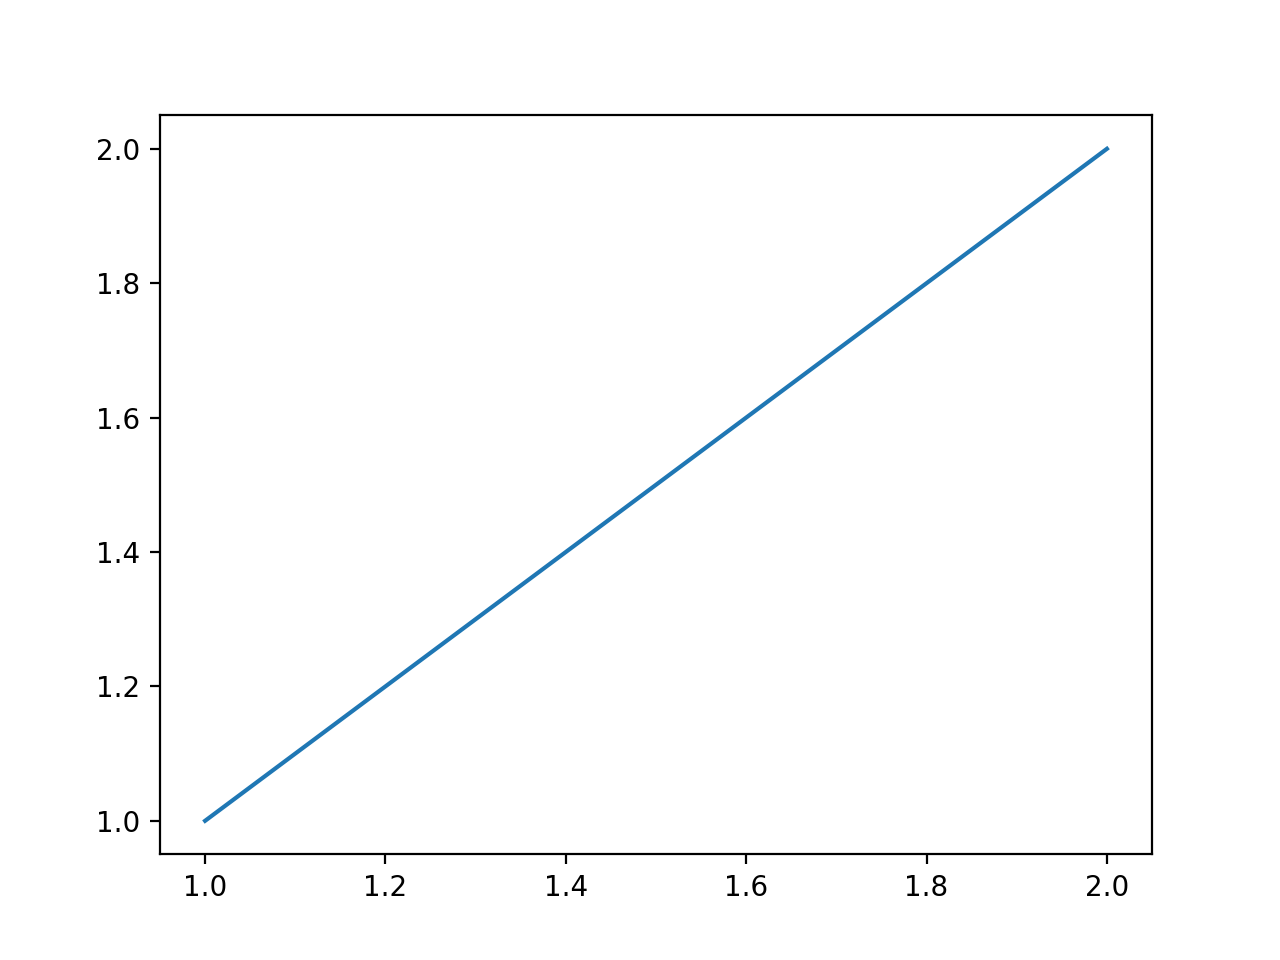

In [18]:
solver = explict_runge(func, x_lim, x_0, y_0, N)
res = solver.match(eps, show = True)

%matplotlib notebook
plt.plot(np.linspace(x_lim[0], x_lim[1], num = N, endpoint = True), res)

In [11]:
y_last

NameError: name 'y_last' is not defined